In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from datetime import datetime, time
#import pandas_datareader.data as pdr
import pandas_datareader.data as pdr
import yfinance as yf

In [4]:
#yf.pdr_override()

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts 

In [6]:

today = datetime.now().date()
five_year_ago = today.replace(year = today.year-5)
ten_year_ago = today.replace(year = today.year-10)
twenty_year_ago = today.replace(year= today.year-20)
stock_symbol = "NVDA"
try:
    data =yf.download(stock_symbol, start=five_year_ago, end=today, rounding=True,multi_level_index=False)
    print(data.head())
except Exception as e:
    print(f"Error: {e}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

            Close  High   Low  Open     Volume
Date                                          
2020-03-11   6.14  6.39  6.04  6.36  499964000
2020-03-12   5.39  5.88  5.38  5.62  816540000
2020-03-13   6.00  6.00  5.47  5.74  634836000
2020-03-16   4.89  5.63  4.83  5.29  726972000
2020-03-17   5.41  5.50  4.76  5.00  833632000


In [7]:
data_return = pd.DataFrame(data['Close'], index=data.index, columns=['Close'])



In [8]:
data_return.head()

,Close
Date,
2020-03-11,6.14
2020-03-12,5.39
2020-03-13,6.00
2020-03-16,4.89
2020-03-17,5.41


In [9]:
data_return['daily_return'] = data_return['Close'].pct_change()
data_return.head()

,Close,daily_return
Date,,
2020-03-11,6.14,NaN
2020-03-12,5.39,-0.122150
2020-03-13,6.00,0.113173
2020-03-16,4.89,-0.185000
2020-03-17,5.41,0.106339


In [10]:
data_return['log_return'] = np.log(data_return['Close']/data_return['Close'].shift(1))
data_return = data_return.dropna()


In [11]:
data_return.head()

,Close,daily_return,log_return
Date,,,
2020-03-12,5.39,-0.122150,-0.130279
2020-03-13,6.00,0.113173,0.107214
2020-03-16,4.89,-0.185000,-0.204567
2020-03-17,5.41,0.106339,0.101057
2020-03-18,5.05,-0.066543,-0.068861


In [12]:
def check_statioinary(df):
    stationary_result = ts.adfuller(df,autolag='AIC')
    print("ADF test statistic", stationary_result[0] )
    print("pvalue", stationary_result[1])
    print("Lag", stationary_result[2])
    print("critical values",stationary_result[4])


In [13]:
from statsmodels.tsa.stattools import kpss

In [14]:
def kpss_test(df):
    result = kpss(df, regression='c',nlags="auto")
    print("Tets statistic", result[0])
    print("p-value",result[1] )
    print("Lag", result[2])
    print("critical values",result[3])

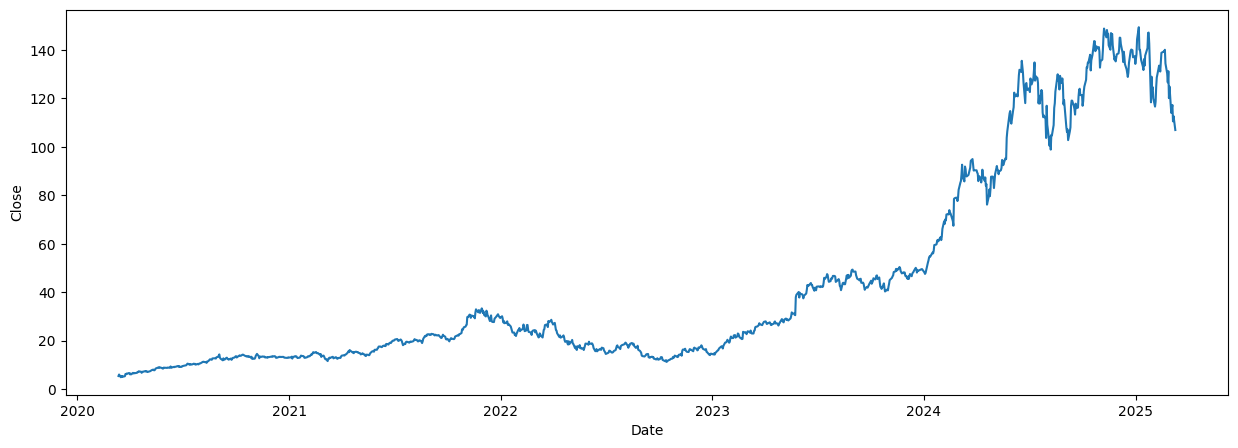

In [15]:
#Plot price data
fig, axs = plt.subplots( figsize=(15,5))
sns.lineplot(data_return['Close'])
plt.show()

In [16]:
#Usind AD Fuller test
check_statioinary(data['Close'])



ADF test statistic -0.30505050701933234
pvalue 0.9247859771814265
Lag 22
critical values {'1%': -3.4356646522289815, '5%': -2.863886926389418, '10%': -2.568019536239491}


In [17]:
#using KPSS test
kpss_test(data['Close'])

Tets statistic 4.232340455418945
p-value 0.01
Lag 21
critical values {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_14537/1382218819.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df, regression='c',nlags="auto")


In [18]:
#Differencing
data_return_diff = data_return['Close'].diff()
data_return_diff = data_return_diff.dropna()
data_return['data_diff'] = data_return_diff
print(data_return_diff)
check_statioinary(data_return_diff)

Date
2020-03-13    0.61
2020-03-16   -1.11
2020-03-17    0.52
2020-03-18   -0.36
2020-03-19    0.26
              ... 
2025-03-04    1.93
2025-03-05    1.31
2025-03-06   -6.73
2025-03-07    2.12
2025-03-10   -5.71
Name: Close, Length: 1254, dtype: float64
ADF test statistic -6.502502894203917
pvalue 1.1524952423080849e-08
Lag 21
critical values {'1%': -3.4356689751083374, '5%': -2.8638888336592387, '10%': -2.5680205519744055}


In [19]:
#Log transform
data_return_log = np.log(data_return['Close'])
data_return_log = data_return_log.dropna()
print(data_return_log)
check_statioinary(data_return_log)

Date
2020-03-12    1.684545
2020-03-13    1.791759
2020-03-16    1.587192
2020-03-17    1.688249
2020-03-18    1.619388
                ...   
2025-03-04    4.753504
2025-03-05    4.764735
2025-03-06    4.705649
2025-03-07    4.724641
2025-03-10    4.672642
Name: Close, Length: 1255, dtype: float64
ADF test statistic -1.030128638394419
pvalue 0.7421176066455526
Lag 1
critical values {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}


Plotting the returns

<Axes: xlabel='Date', ylabel='log_return'>

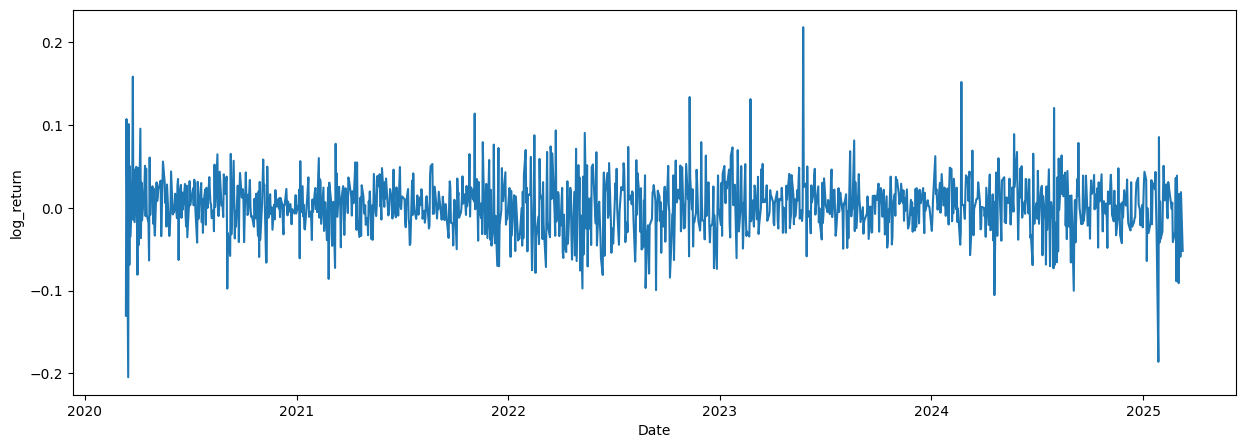

In [20]:
fig, axs = plt.subplots(figsize=(15,5))
sns.lineplot(data_return['log_return'])

In [21]:
data_return.head()

,Close,daily_return,log_return,data_diff
Date,,,,
2020-03-12,5.39,-0.122150,-0.130279,NaN
2020-03-13,6.00,0.113173,0.107214,0.61
2020-03-16,4.89,-0.185000,-0.204567,-1.11
2020-03-17,5.41,0.106339,0.101057,0.52
2020-03-18,5.05,-0.066543,-0.068861,-0.36


Text(0.5, 1.0, 'log return')

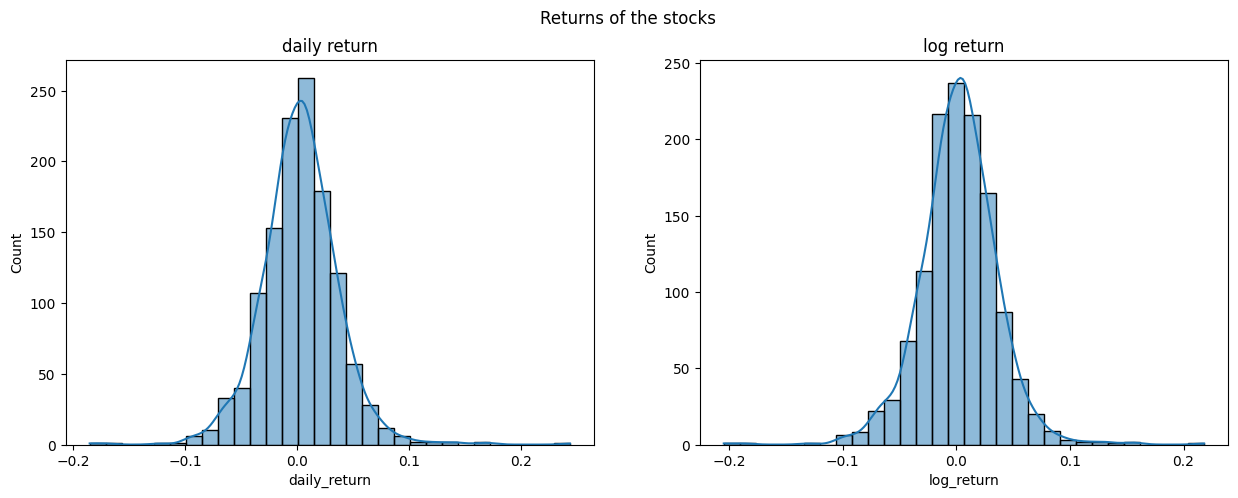

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Returns of the stocks")
sns.histplot(ax = axs[0],data=data_return, x = 'daily_return', bins=30,kde=True)
axs[0].set_title("daily return")
sns.histplot(ax = axs[1], data = data_return,x ='log_return', bins=30,kde=True)
axs[1].set_title("log return")



In [23]:
mean_daily_return = data_return['daily_return'].mean()
std_daily_return = data_return['daily_return'].std()

Calculating and  Plotting autocorrelation 

In [24]:
#data_return['autocorr_20'] = data_return['Close'].rolling(window=20).apply(lambda x: x.autocorr())
#data_return.head(100)

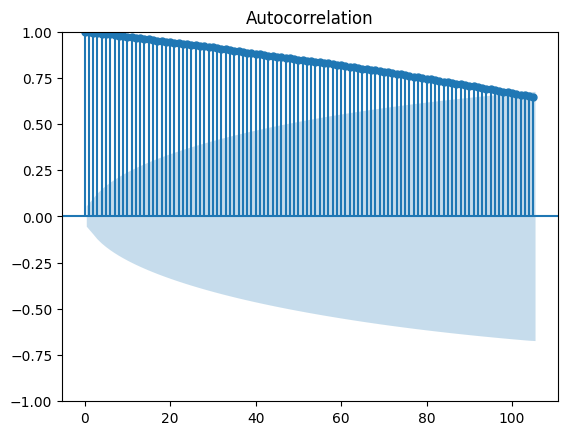

In [25]:
plot_acf(data_return['Close'], lags=105);

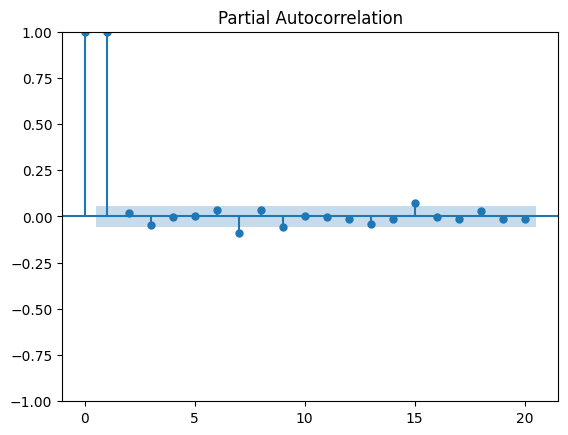

In [26]:
plot_pacf(data_return['Close'], lags=20);

In [27]:
data_return.head(10)

,Close,daily_return,log_return,data_diff
Date,,,,
2020-03-12,5.39,-0.122150,-0.130279,NaN
2020-03-13,6.00,0.113173,0.107214,0.61
2020-03-16,4.89,-0.185000,-0.204567,-1.11
2020-03-17,5.41,0.106339,0.101057,0.52
2020-03-18,5.05,-0.066543,-0.068861,-0.36
2020-03-19,5.31,0.051485,0.050204,0.26
2020-03-20,5.13,-0.033898,-0.034486,-0.18
2020-03-23,5.30,0.033138,0.032601,0.17
2020-03-24,6.21,0.171698,0.158454,0.91


Data Preprocessing

In [28]:
prices = data_return.filter(['Close'])
print(prices)
#convert the dataframe to numpy
dataset = prices.values
print(dataset)


             Close
Date              
2020-03-12    5.39
2020-03-13    6.00
2020-03-16    4.89
2020-03-17    5.41
2020-03-18    5.05
...            ...
2025-03-04  115.99
2025-03-05  117.30
2025-03-06  110.57
2025-03-07  112.69
2025-03-10  106.98

[1255 rows x 1 columns]
[[  5.39]
 [  6.  ]
 [  4.89]
 ...
 [110.57]
 [112.69]
 [106.98]]


In [29]:
#Get the number of rows to train the model
train_data_len = int(np.ceil(len(dataset) * 0.8))
print(train_data_len)

1004


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [31]:
#Normalise the data
scaler = StandardScaler()
scaled_data  = scaler.fit_transform(dataset)
print(scaled_data)


[[-0.90827519]
 [-0.89353116]
 [-0.92036046]
 ...
 [ 1.63398229]
 [ 1.68522384]
 [ 1.54721005]]


In [32]:
#Create the training data set
train_data = scaled_data[0:int(train_data_len), :]
print(len(train_data))

#Split into X_train and y_train 
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

    if i <=61:
        print(x_train)
        print(y_train)
        print()

1004
[array([-0.90827519, -0.89353116, -0.92036046, -0.90779178, -0.91649317,
       -0.91020883, -0.91455953, -0.91045054, -0.88845534, -0.89063069,
       -0.88362124, -0.88628   , -0.87854542, -0.87975395, -0.89208093,
       -0.88482976, -0.89159751, -0.87685348, -0.88265441, -0.87782031,
       -0.88023736, -0.87612837, -0.86766868, -0.86936062, -0.86114263,
       -0.86259287, -0.86573504, -0.87637007, -0.86621845, -0.86766868,
       -0.8642848 , -0.8596924 , -0.86307628, -0.85896728, -0.86259287,
       -0.8683938 , -0.86307628, -0.86162604, -0.85920899, -0.8551    ,
       -0.8505076 , -0.84422325, -0.8507493 , -0.85123271, -0.84519008,
       -0.83407163, -0.82778729, -0.82657876, -0.82246977, -0.82730388,
       -0.82126124, -0.8285124 , -0.83334651, -0.83407163, -0.82488682,
       -0.82657876, -0.82609535, -0.82730388, -0.82730388, -0.8236783 ])]
[-0.8263370548067098]

[array([-0.90827519, -0.89353116, -0.92036046, -0.90779178, -0.91649317,
       -0.91020883, -0.91455953,

In [33]:
#convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [34]:
y_train.shape

(944,)

In [35]:
#Building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam




In [36]:
#Build the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/Users/shalini/workspace/stock_analysis/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
#Compile the model
model.compile(optimizer='Adam', loss= 'mean_squared_error')

In [38]:
model.fit(x_train, y_train, batch_size = 32, epochs= 50)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0575
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0028
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0019
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0021
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0019
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0018
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0016
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0016
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0015
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0015
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0015
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0015
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0012
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0013
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0012
Epoc

In [42]:
#create a new array containing scaled values 
test_data = scaled_data[train_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
#j=0
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    #print(test_data[i-60:i , 0])
    x_test.append(test_data[i-60:i , 0])

#convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#Get the model predicted prices values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) **2)))
rmse



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


17.3833816990564

In [ ]:
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization

n_input = 6
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32), 
               activation='relu', input_shape=(n_input, 1)))
    model.add(Dense(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])))

return model

bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=3,
    executions_per_trial=1,
    directory=os.path.normpath('C:/keras_tuning'),
    project_name='kerastuner_bayesian_poc',
    overwrite=True)

bayesian_opt_tuner.search(train_x, train_y,epochs=n_epochs,
     #validation_data=(X_test, y_test)
     validation_split=0.2,verbose=1)


bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model = bayes_opt_model_best_model[0]

In [40]:
#Plot the data
train = data[:train_data_len]
valid = data[train_data_len+1: ]
valid['Predictions'] = predictions



/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_14537/3245761984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


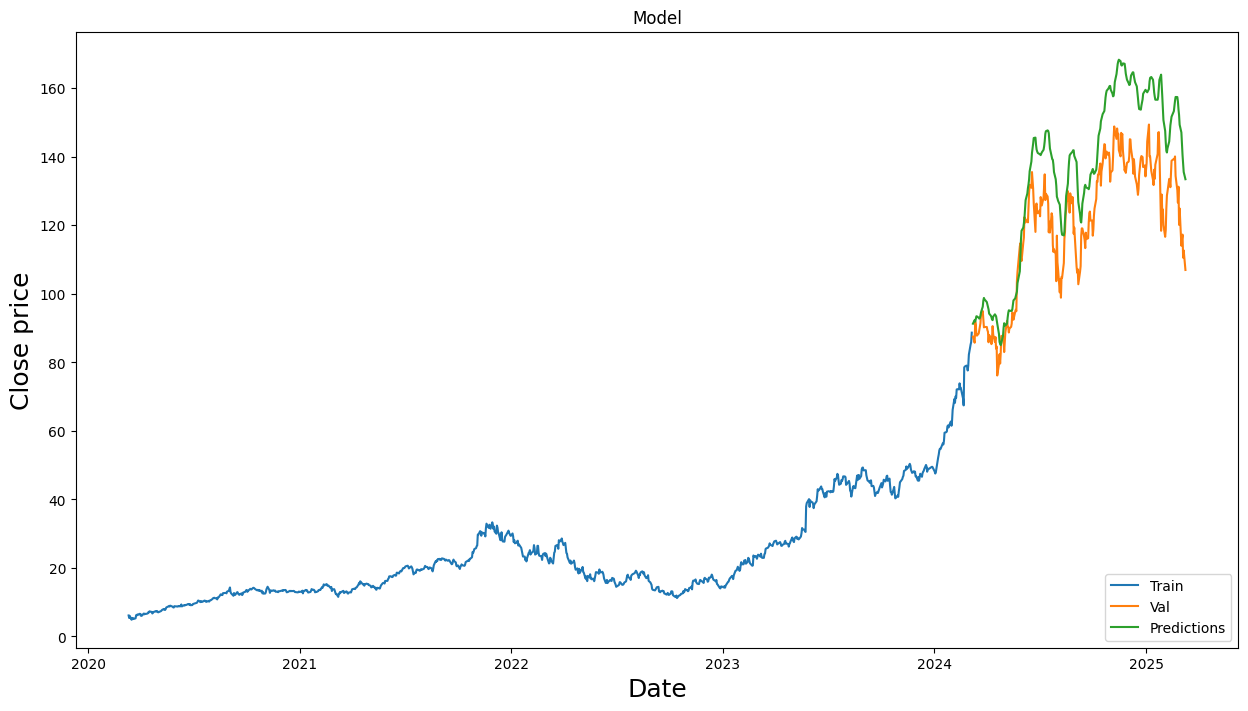

In [41]:
#Visualise the data
plt.figure(figsize=(15,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [134]:
import plotly.graph_objs as go

In [136]:
#plt.figure(figsize=(15,8))
#plt.title('Model')
#plt.xlabel('Date', fontsize = 18)
#plt.ylabel('Close price', fontsize = 18)
fig = go.Figure(data=[go.Candlestick(x = data_return.index, close = train['Close'],  uid= valid[['Close', 'Predictions']])])

fig.update_layout(xaxis_rangeslider_visible = True, title ='Model')

fig.show()
#plt.plot(valid[['Close', 'Predictions']])
#plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
#plt.show()

ValueError: 
    Invalid value of type 'pandas.core.frame.DataFrame' received for the 'uid' property of candlestick
        Received value:              Close  Predictions
Date                           
2024-03-01  178.82   179.946854
2024-03-04  174.28   178.845795
2024-03-05  169.32   174.174820
2024-03-06  168.33   169.225006
2024-03-07  168.21   168.449280
...            ...          ...
2025-02-25  247.04   244.986832
2025-02-26  240.36   244.907608
2025-02-27  237.30   237.643692
2025-02-28  241.84   234.608170
2025-03-03  238.03   240.020706

[251 rows x 2 columns]

    The 'uid' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [174]:
model = Sequential([Input((2,1)),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(32, activation = 'relu'),
                    Dense(1)])

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs = 100)

ValueError: Invalid dtype: datetime64[ns]

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_data.shape[0], train_data.shape[1])))

#model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Dense(3,activation='softmax'))
   

IndexError: tuple index out of range